In [54]:
import sympy 
from sympy import Matrix, symbols
sympy.init_printing()

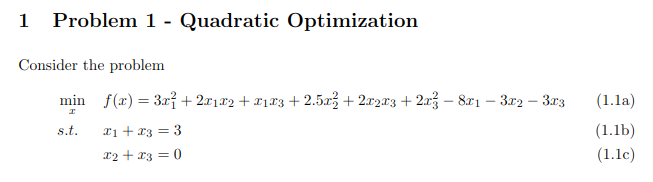

In [10]:
x = sympy.symbols("x1:4", real=True)
f = 3*x[0]**2 + 2*x[0]*x[1] + x[0]*x[2] + 2.5*x[1]**2 + 2*x[1]*x[2] + 2* x[2]**2 - 8 * x[0] - 3*x[1] - 3*x[2]
f_m = sympy.Matrix([f])
f_m

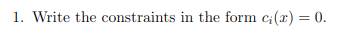

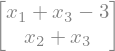

In [5]:
c1 = x[0] + x[2] - 3
c2 = x[1] + x[2]
c1, c2
g = sympy.Matrix([c1,c2])
g

In [51]:
mu = sympy.MatrixSymbol("mu", 2,1)
mu = sympy.Matrix(sympy.symbols("mu1:3",real=True))

L = f_m - mu.T @ g

L

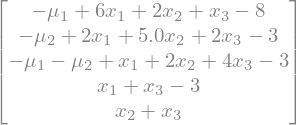

In [52]:
import numpy as np
eqs = sympy.Matrix(np.concatenate([np.squeeze(np.array([L.diff(sympy.Matrix(x))])), np.squeeze(np.array(g))]).reshape(5,1))
eqs

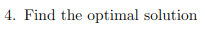

In [49]:
sympy.solve(eqs)

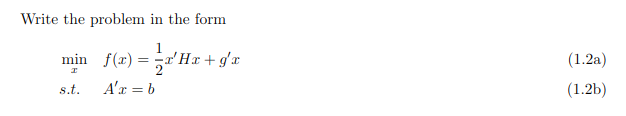

original problem
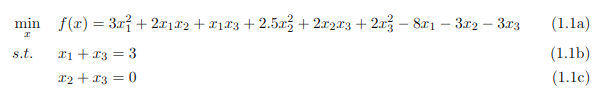

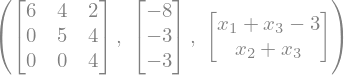

In [72]:
x_m = Matrix(x)
H = sympy.Matrix([[6,4,2],[0,5,4],[0,0,4]])
gm = sympy.Matrix([[-8],[-3],[-3]])
A = sympy.Matrix([[1,0,1],[0,1,1]]).T
b = sympy.Matrix([[3],[0]])
assert sympy.expand(1/2* x_m.T @ H @ x_m + gm.T @ x_m) - f_m == sympy.Matrix([0])
H, gm, A.T @ x_m - b

In [78]:
f_m_n = 1/2 * x_m.T @ H @ x_m + gm.T @ x_m
g_n = A.T @ x_m - b
import symengine
mu_n = sympy.Matrix(symengine.symarray('mu', g_n.shape))

In [79]:
L_n = f_m_n - mu_n.T @ g_n
L_n

In [87]:
L_n_diff = sympy.Array(L_n.diff(x_m)).reshape(3)
L_n_diff

In [99]:
sympy.solve(L_n_diff.tolist() + np.squeeze(g_n.tolist()).tolist())

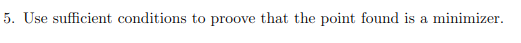

In [107]:
#H.is_positive_definite, "Truely"
sympy.Matrix(np.squeeze(np.array(L_n_diff.diff(x_m)))).is_positive_definite, "Truely"

(True, 'Truely')

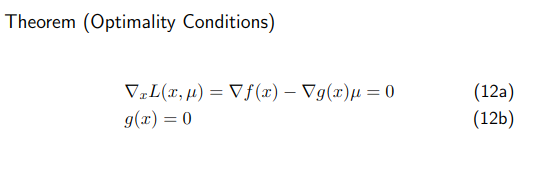

We see already used solve, so we know these conditions are met.

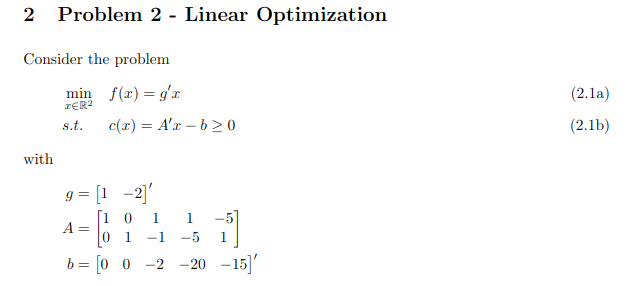

In [111]:
g_2 = sympy.Matrix([1,-2]).reshape(2,1)
A = sympy.Matrix([[1,0,1,1,-5],[0,1,-1,-5,1]])
b = sympy.Matrix([0,0,-2,-20,-15]).reshape(5,1)
x = sympy.Matrix(symbols("x0:2",real=True))

In [114]:
f_2 = g_2.T @ x
c_2 = A.T @ x - b

In [116]:
def squeeze(matrix, cls=sympy.Matrix):
    return cls(np.squeeze(np.array(matrix)))

In [122]:
f_2_lamb = sympy.lambdify(x,f_2)

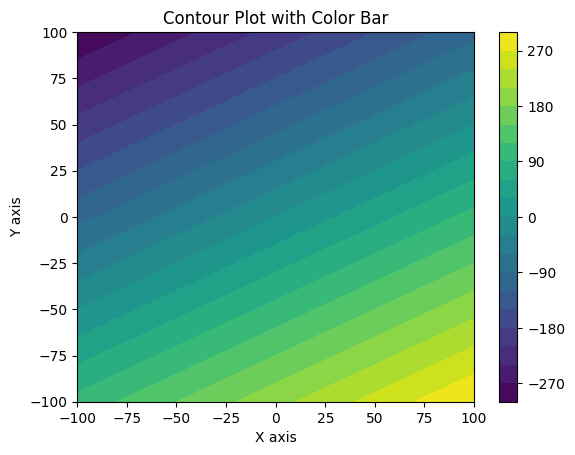

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grid of points
X = np.linspace(-100, 100, 100)
Y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(X, Y)

# Define a function to plot
Z = np.squeeze(f_2_lamb(X,Y))
# Create a contour plot
# Create a contour plot
contour = plt.contourf(X, Y, Z, levels=20)  # Using 20 contour levels for smoothness

# Add a color bar
plt.colorbar(contour)

# Add additional features
plt.title('Contour Plot with Color Bar')
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Show the plot
plt.show()

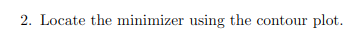

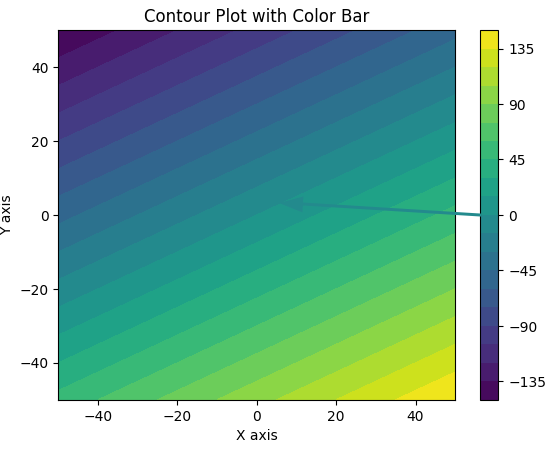

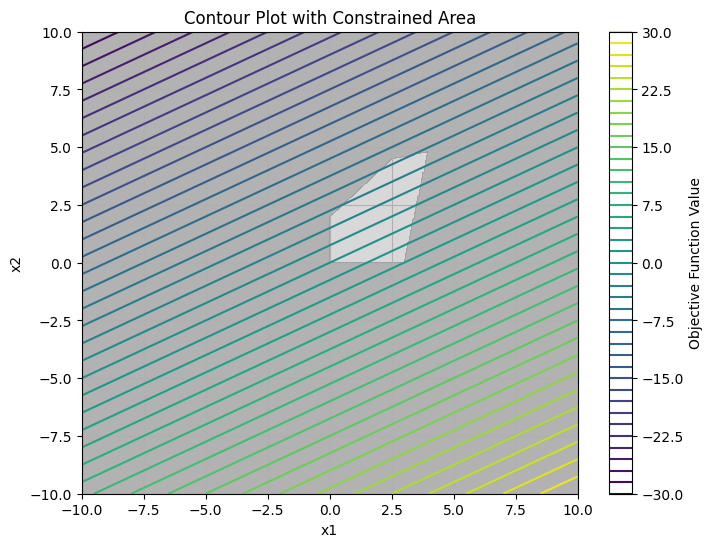

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the objective function f(x) = g^T x
def f(x, g):
    return np.dot(g, x)

# Define the constraints c(x) = Ax - b
def c(x, A, b):
    return np.dot(A, x) - b

# Given values
g = np.array([1, -2])
A = np.array([[1, 0, 1, 1, -5],
              [0, 1, -1, -5, 1]])
b = np.array([0, 0, -2, -20, -15])

# Create a grid of x values
x1_range = np.linspace(-10, 10, 400)
x2_range = np.linspace(-10, 10, 400)
x1, x2 = np.meshgrid(x1_range, x2_range)
# Evaluate the objective function on the grid
z = g[0] * x1 + g[1] * x2

plt.figure(figsize=(8, 6))

# Create contour plot for the objective function
contour = plt.contour(x1, x2, z, levels=50, cmap=cm.viridis)
plt.colorbar(contour, label='Objective Function Value')

# Plot the feasible region
# For each constraint in A*x >= b, we find the region where it is satisfied
# Then we take the intersection (i.e., minimum) of these regions to find the feasible region
feasible_region = np.ones_like(x1)
for i in range(A.shape[1]):
    # Constraint i: A[:, i] * [x1, x2] >= b[i]
    feasible_region = np.minimum(feasible_region, (A[0, i] * x1 + A[1, i] * x2 >= b[i]))

# Plot the feasible region on the contour plot
plt.contourf(x1, x2, feasible_region, levels=[0, 0.5, 1], alpha=0.3, colors=['none', 'grey'])

# Label the plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot with Constrained Area')

# Show the plot with grid
plt.grid(True)
plt.show()